In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

In [2]:
E_Na = 50 * b2.mV
g_Na = 50 * b2.msiemens
g_Kd = 5 * b2.msiemens
g_T = 5 * b2.msiemens
E_Kd = -90 * b2.mV
E_K = -90 * b2.mV
E_L = -70 * b2.mV
g_M = 0.004 * b2.msiemens
g_L = 0.004 * b2.msiemens
tau_max = 4 * b2.second
E_Ca = 120 * b2.mV
g_Leak = 0.3 * b2.msiemens
E_Leak = -70 * b2.mV
C_membrane = 1 * b2.ufarad
vx = 2 * b2.mV
vt = - 65 * b2.mV
eqs = """
  dvm/dt = (1 / C_membrane) * membrane_Im : volt
  membrane_Im = I_Leak+I_Na+I_Kd+I_M+I_T+I_L : amp
  I_Leak = g_Leak*(E_Leak-vm) : amp
  I_Na = g_Na*m**3*h*(E_Na-vm) : amp
  I_Kd = g_Kd*n**4*(E_Kd-vm) : amp
  I_M = g_M*p*(E_K-vm) : amp
  I_L = g_L*q*q*r*(E_Ca-vm) : amp
  I_T = g_T*s*s*u*(E_Ca-vm) : amp
  alpham = -0.32*(vm-vt-13*mV)/(exp(-(vm-vt-13*mV)/(4*mV))-1)/mV/ms : Hz
  betam = (0.28*(vm-vt-40*mV)/(exp((vm-vt-40*mV)/(5*mV))-1))/mV/ms : Hz
  alphah = 0.128*exp(-(vm-vt-17*mV)/(18*mV))/ms : Hz
  betah = 4/(1+exp(-(vm-vt-40*mV)/(5*mV)))/ms : Hz
  dm/dt = alpham*(1-m)-betam*m : 1
  dh/dt = alphah*(1-h)-betah*h : 1
  alphan = -0.032*(vm-vt-15*mV)/(exp(-(vm-vt-15*mV)/(5*mV))-1)/mV/ms : Hz
  betan = (0.5*exp(-(vm-vt-10*mV)/(40*mV)))/ms : Hz
  dn/dt = alphan*(1-n)-betan*n : 1
  p_inf = 1/(1+exp(-(vm+35*mV)/(10*mV))) : 1
  tau = tau_max/(3.3*exp((vm+35*mV)/(20*mV))+exp(-(vm+35*mV)/(20*mV))) : second
  dp/dt = (p_inf-p)/tau : 1
  alphaq = 0.055*(-27*mV-vm)/(exp((-27*mV-vm)/(3.8*mV))-1)/mV/ms : Hz
  betaq = 0.94*exp((-75*mV-vm)/(17*mV))/ms : Hz
  alphar = 0.000457*exp((-13*mV-vm)/(50*mV))/ms : Hz
  betar = 0.0065/(exp((-vm-15*mV)/(28*mV))+1)/ms : Hz
  dq/dt = alphaq*(1-q)-betaq*q : 1
  dr/dt = alphar*(1-r)-betar*r : 1
  s = 1/(1+exp(-(vm+vx+57*mV)/(6.2*mV))) : 1
  u_inf = 1/(1+exp((vm+vx+81*mV)/(4*mV))) : 1
  tau_u = (30.8+211.4*exp((vm+vx+113.2*mV)/(5*mV)))/(3.7 * (1 + exp((vm+vx+84*mV)/(3.2*mV)))) * ms : second
  du/dt = (u_inf-u)/tau_u : 1
"""


In [3]:
b2.start_scope()
neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")
neuron.vm = -70*b2.mV

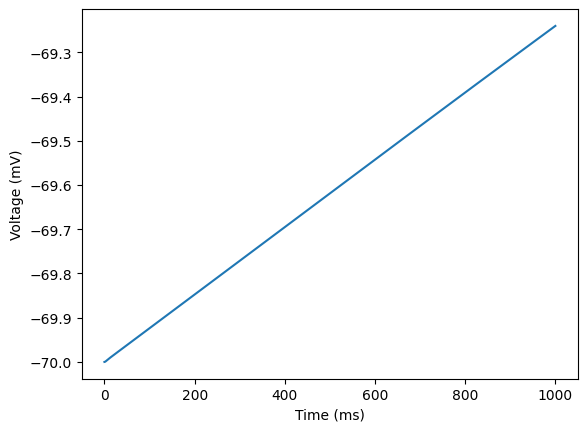

In [4]:
M = b2.StateMonitor(neuron, 'vm', record=True)

#neuron.membrane_Im[0] = 0.5*b2.nA  # current injection at one end
b2.run(1000*b2.ms)
b2.plot(M.t/b2.ms, M.vm[0]/b2.mV)
b2.xlabel('Time (ms)')
b2.ylabel('Voltage (mV)');